# <b>Project - Unsupervised Learning - AIML - Aishik Sengupta</b>

--------------


## <b><u>Data Description</u></b> :
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



## <b><u>Domain</u></b> :
Object recognition



## <b><u>Context</u></b> :
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.



## <b><u>Attribute Information</u></b> :

<ul>
    <li>All the features are geometric features extracted from the silhouette.</li>
    <li>All are numeric in nature.</li>
</ul>




## <b><u>Learning Outcomes</u></b>:

<ul>
    <li>Exploratory Data Analysis</li>
    <li>Reduce number dimensions in the dataset with minimal information loss</li>
    <li>Train a model using Principle Components</li>
</ul>


## <b><u>Objective</u></b> :

Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.



## <b><u>Steps and tasks</u></b>:


<ol>
    <li>Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm</li>
    <li>Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why</li>
    <li>Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)</li>
    <li>Train a Support vector machine using the train set and get the accuracy on the test set</li>
    <li>Perform K-fold cross validation and get the cross validation score of the model</li>
    <li>Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data</li>
    <li>Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.</li>
    <li>Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings</li>
</ol>
<br>
<br>
<br>
<br>
<br>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# various scaling algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore

from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.model_selection import cross_val_score # for performing cross validation of models
from sklearn.svm import SVC # Support vector machine model

from sklearn.utils import shuffle
from sklearn import metrics # to get various evaluation metrics
from sklearn.metrics import roc_auc_score # receiver operating curve score

from sklearn.metrics import accuracy_score # accuracy of prediction score
from sklearn.metrics import recall_score # recall score
from sklearn.metrics import precision_score # precision score
from sklearn.metrics import f1_score # f1 score

from sklearn.decomposition import PCA # performing principal components analysis

In [3]:
# read the dataset to a dataframe
df = pd.read_csv('vehicle.csv')

In [4]:
# taking a look at the first 10 rows of the dataframe, already seeing some missing values
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [5]:
df.info() # basic info such as datatype, value types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [12]:
df.shape # dimensions of the dataframe

(846, 19)

<br>
<br>

## Data Preprocessing

In [7]:
# To label encode our target variable
encoder = LabelEncoder()
encoder.fit(df['class'])

LabelEncoder()

In [8]:
df['class'] = encoder.transform(df['class'])

In [9]:
# To check for missing or null values
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [15]:
#To impute missing values
impute = SimpleImputer( missing_values= np.nan , strategy='median')
#impute = impute.fit(df[:,0:18])
df.iloc[:,0:18] = impute.fit_transform(df.iloc[:,0:18])

In [43]:
# separating the dataframe into three dataframes based on target variable
#bus = df[df['class']==0]
#car = df[df['class']==1]
#van = df[df['class']==2]

In [45]:
# using median to fill the null or missing values of each column based on each vehicle
#medianFiller = lambda x: x.fillna(x.median())
#bus = bus.apply(medianFiller, axis=0)
#car = car.apply(medianFiller, axis=0)
#van = van.apply(medianFiller, axis=0)


In [46]:
#truncating the original dataframe
#df.drop(df.index, inplace=True)

In [47]:
#appending the three dataframes to the original dataframe after filling missing or null values
#df = df.append(bus).append(car).append(van)

In [15]:
#df.sample(frac=1).reset_index(drop= True)

In [16]:
#df = df.sample(frac=1)

In [17]:
# Replacing the null values with median values of proper class vehicle

#i = 0

#while i < len(missing_cols):
#    df[df[missing_cols[i]].isna() == True].loc[df['class'] == 0, missing_cols[i]].replace(np.nan,df[df[missing_cols[i]].isna() == False].loc[df['class'] == 0, missing_cols[i]].median())
#    df[df[missing_cols[i]].isna() == True].loc[df['class'] == 1, missing_cols[i]].replace(np.nan,df[df[missing_cols[i]].isna() == False].loc[df['class'] == 1, missing_cols[i]].median())
#    df[df[missing_cols[i]].isna() == True].loc[df['class'] == 2, missing_cols[i]].replace(np.nan,df[df[missing_cols[i]].isna() == False].loc[df['class'] == 2, missing_cols[i]].median())
#    i += 1

In [18]:
# Taking a look at the missing or null values, no more present after median filling data
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [19]:
# just to check the new df in csv file
df.to_csv('check1.csv')

In [50]:
# to shuffle the rows of the dataset after appending to get mixed rows
#df = shuffle(df)

In [51]:
#df.reset_index(drop = True, inplace = True) # reset index after shuffle

In [20]:
df['class'] = df['class'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [24]:
#numeric_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
#numeric_cols

In [25]:
#df[numeric_cols] = df[numeric_cols].apply(zscore)

<br>
<br>

## Understanding the relationship b/w Independent variables

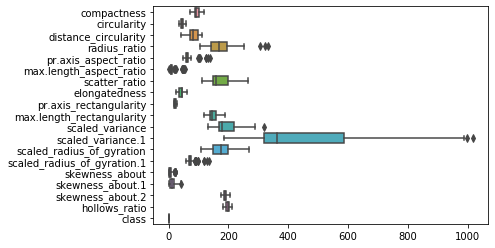

In [22]:
# Doing a boxplot on the whole data to check
sns.boxplot( data=df, orient= "h" )

## Univariate Analysis

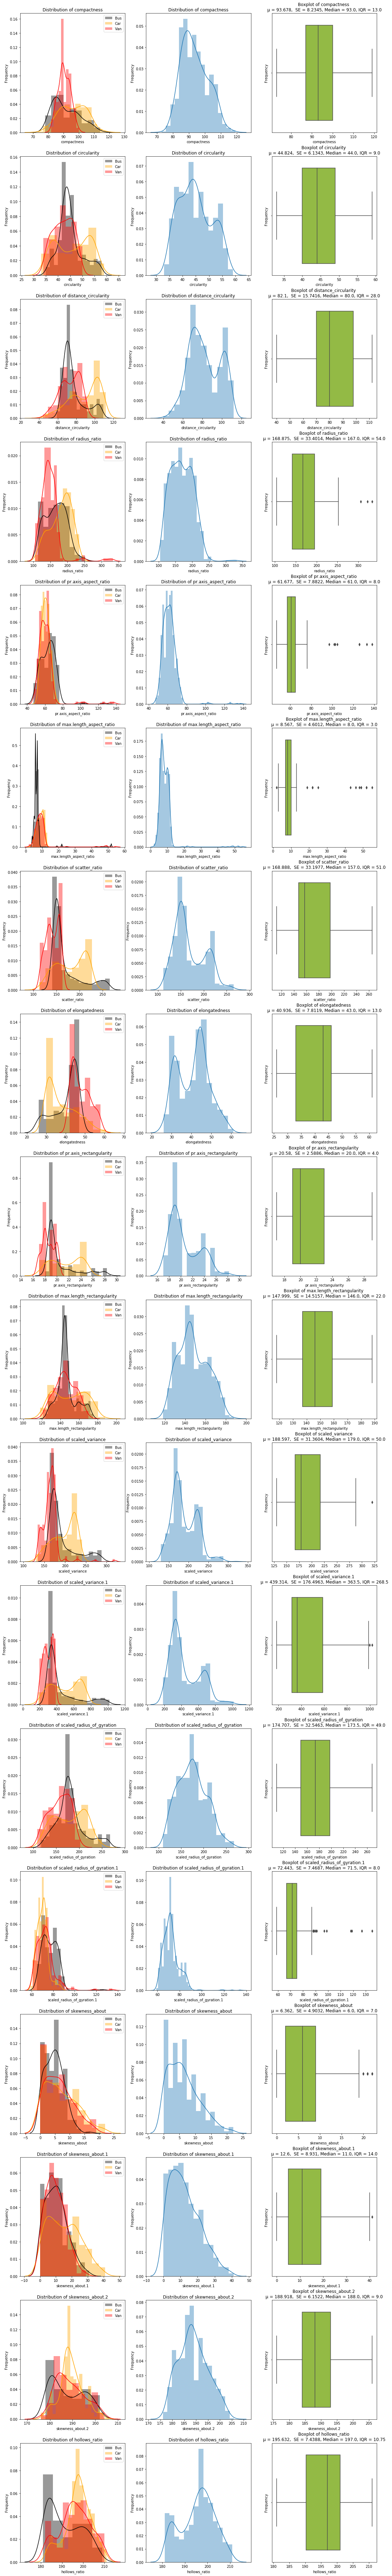

In [23]:
plt.figure(figsize = (18,132))
cols = df.columns.values

i=0 # column counter 
j=1 # plot counter
k=1 # plot counter of each variable

while i < (len(cols) - 1):
    if k == 1:
        plt.subplot(18,3,j)
        sns.distplot(df[df['class'] == 0][cols[i]], color= 'black',  label='Bus')
        sns.distplot(df[df['class'] == 1][cols[i]], color = 'orange',  label='Car')
        sns.distplot(df[df['class'] == 2][cols[i]], color = 'red',  label='Van')
        j+=1
        k+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    elif k == 2:
        plt.subplot(18,3,j)
        sns.distplot(df[cols[i]])
        j+=1
        k+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
    else:
        plt.subplot(18,3,j)
        sns.boxplot(df[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(df[cols[i]],[25,75])
        IQR = q3 - q1 
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(df[cols[i]].mean(), 3)},  SE = {round(df[cols[i]].std(),4)}, Median = {round(df[cols[i]].median(),3)}, IQR = {round(IQR, 3)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1
        k=1

## Insights From Univariate Analysis

<ul>
    <li>The distance plots represent almost normal distribution or bi-modal distribution.
    </li>
    <br>
    <li>From the boxplots, we can see outliers present in skewness_about.1, skewness_about, scaled_radius_of_gyration.1, scaled_variance, scaled_variance.1, max_length_aspect_ratio, pr.axis_aspect_ratio and radius_ratio
    </li>
    <br>
    <li>We are not going to remove outliers as the dataset itself is small, outliers are few in number here and would not want to cause any critical loss of data if they hold any. Plus we dont have much domain expertise on the predictors.
    </li>
    <br>
    <li>Regarding the distance plots concerning the target variables, we can see there is high overlap of data between all the vehicles. Visualization is not enough to see the independence of data among target variables.
    </li>
    <br>
    <li>Visually the predictors which show some independence among the target variables are skewness_about.2, scaled_variance.1, scaled_variance, scatter_ratio, elongatedness, pr.axis_rectangularity and distance_circularity
    </li>
</ul>

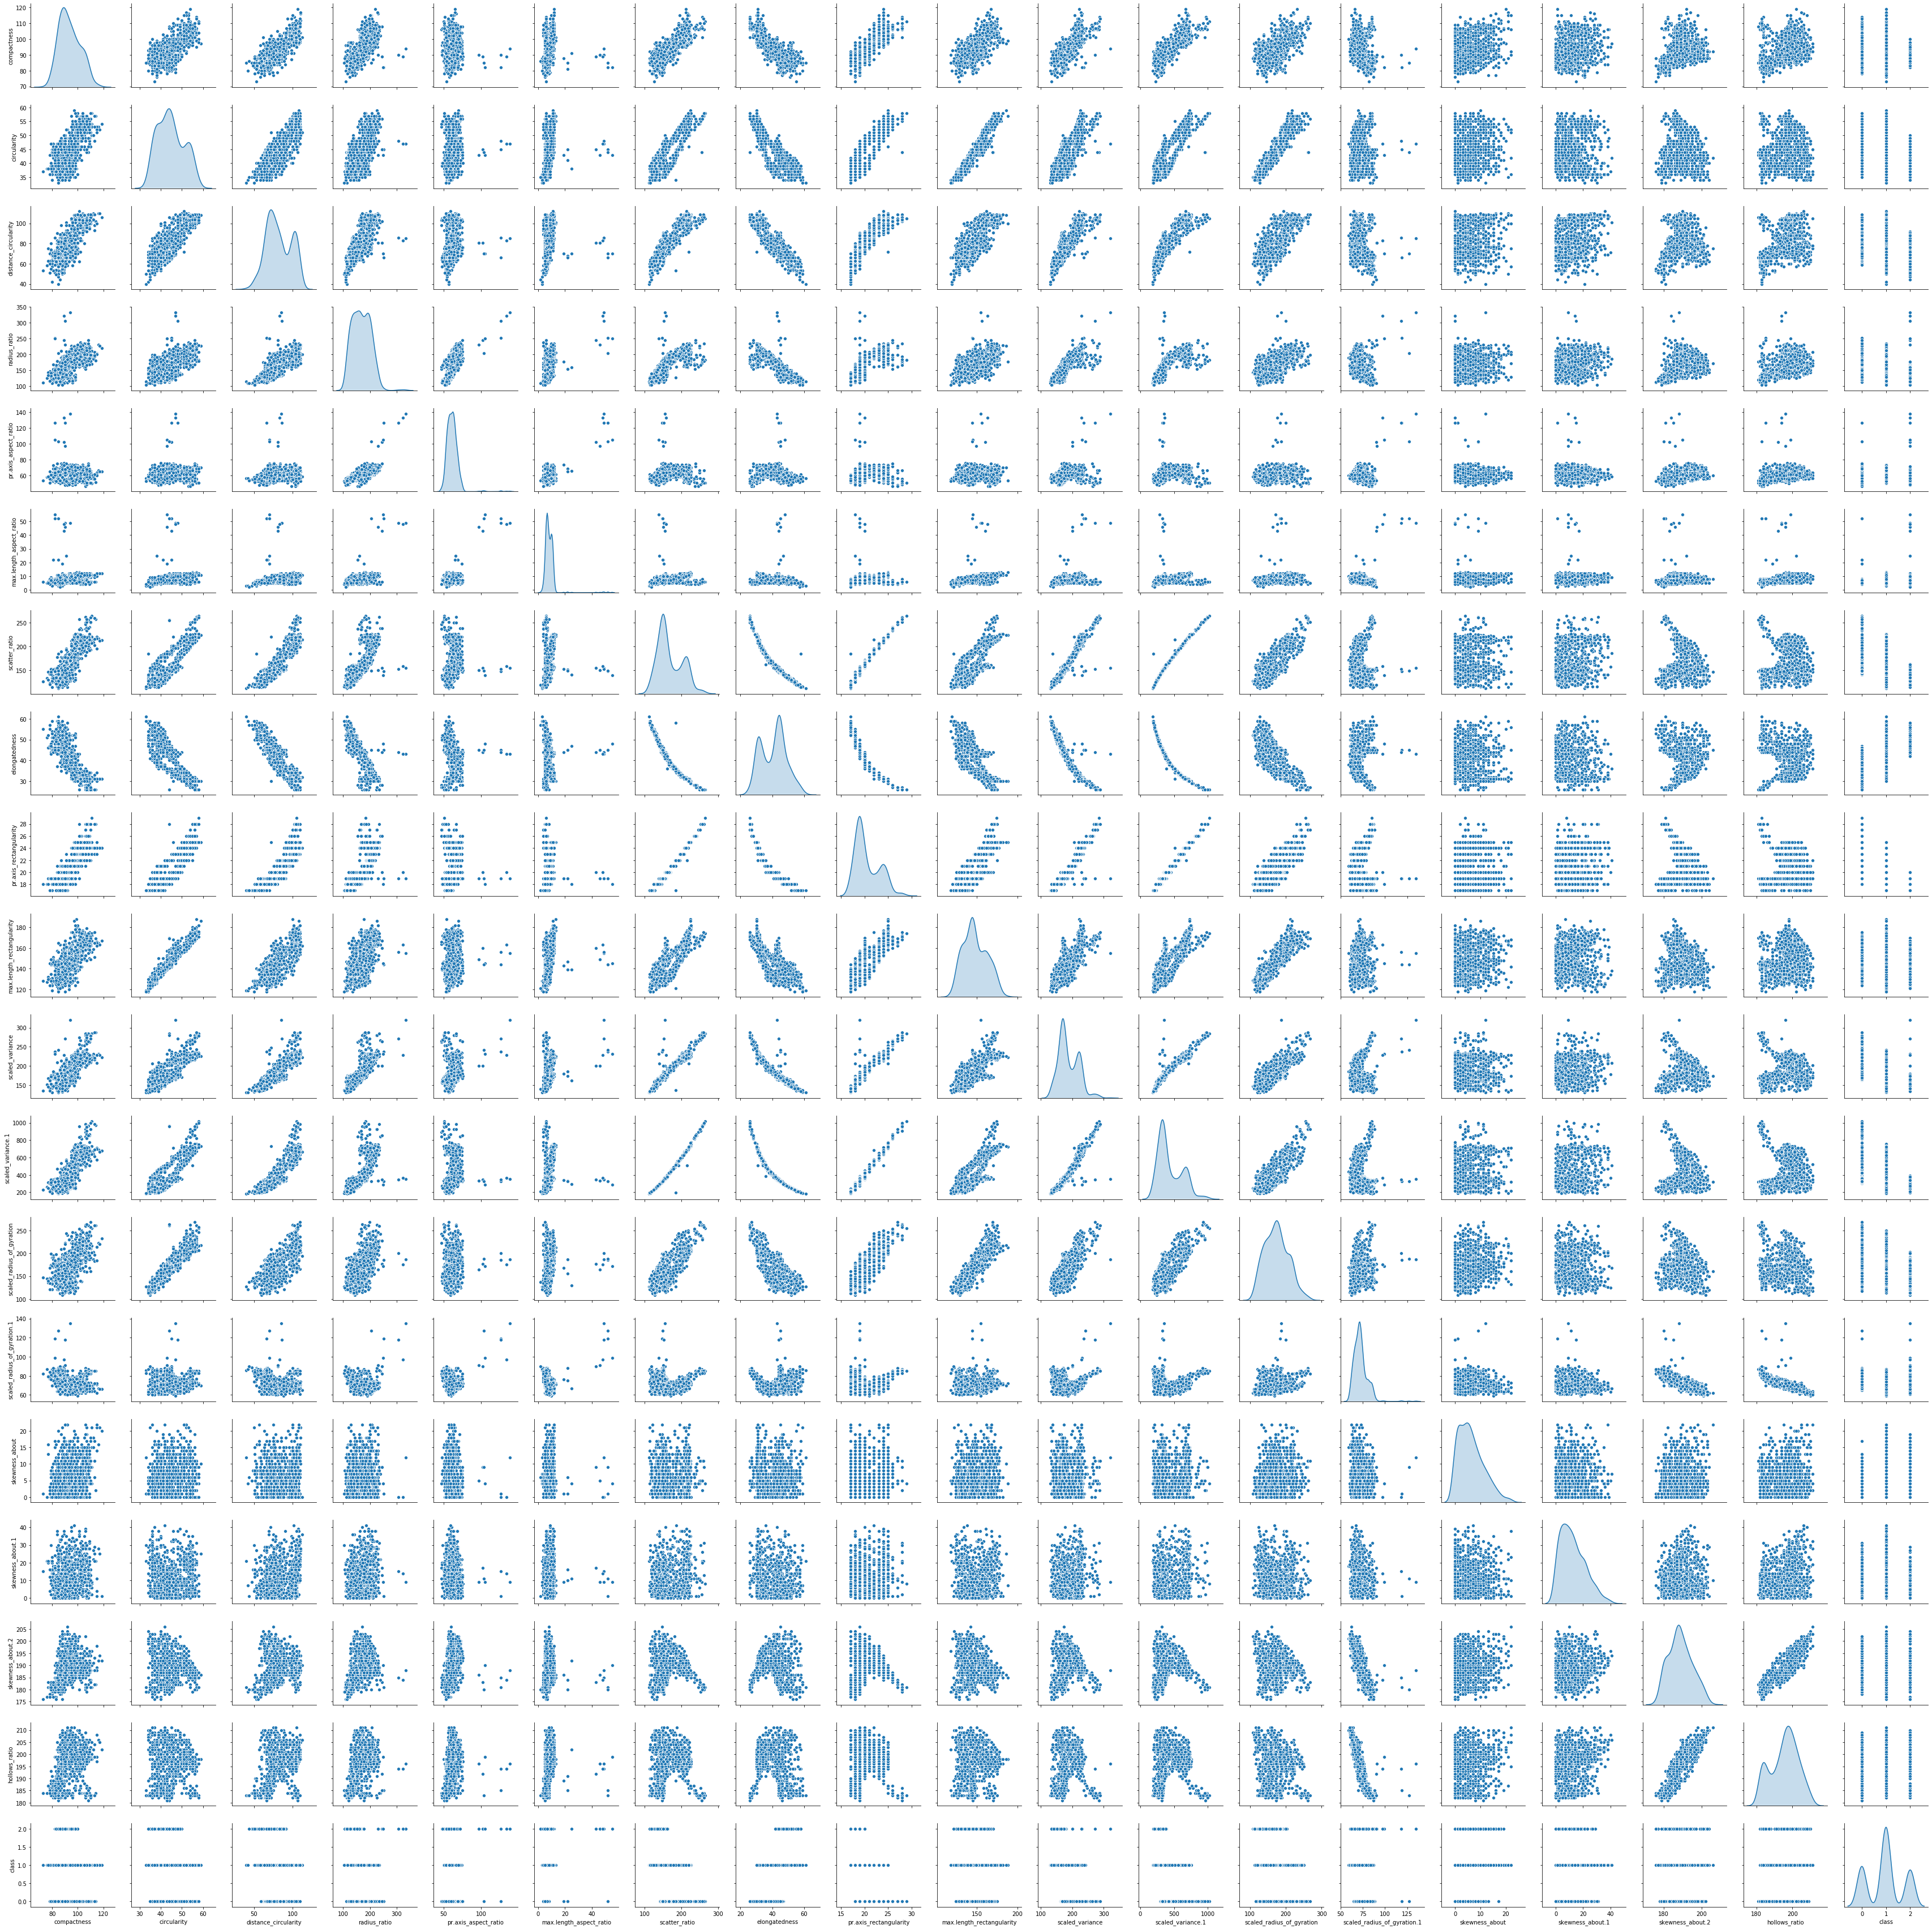

In [29]:
sns.pairplot(df, diag_kind='kde')


## Insights From Pair Plots
<br>
<ul>
    <li>elongatedness seems to have a high negative correlation with multiple attributes like compactness, circularity,  distance_circularity, radius_ratio, scatter_ratio, pr_axis.rectangularity, max_length.rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration
    </li>
    <br>
    <li>compactness seems to have a high positive correlation with pr_axis.rectangularity and scaled_variance.1
    </li>
    <br>
    <li>distance_circularity and radius_ratio seems to have a good positive correlation with scaled_radius_of_gyration, scaled_variance, scaled_variance.1 and pr_axis.rectangularity
    </li>
    <br>
    <li>skewness_About.2 and hollows_ratio is positively correlated.
    </li>
    <br>
    <li>scatter_ratio has a positive correlation with pr_axis.rectangularity, max_length.rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration
    </li>
    <br>
    <li>scaled_variance and scaled_variance.1 is highly correlated
    </li>
    <br>
    <li>The seven variables of elongatedness,scatter_ratio, pr_axis.rectangularity, max_length.rectangularity, scaled_variance, scaled_variance.1 and scaled_radius_of_gyration are high correlated among each other
    </li>
</ul>

## Plotting a HeatMap to confirm above insights and get actual pearson correlation coefficient

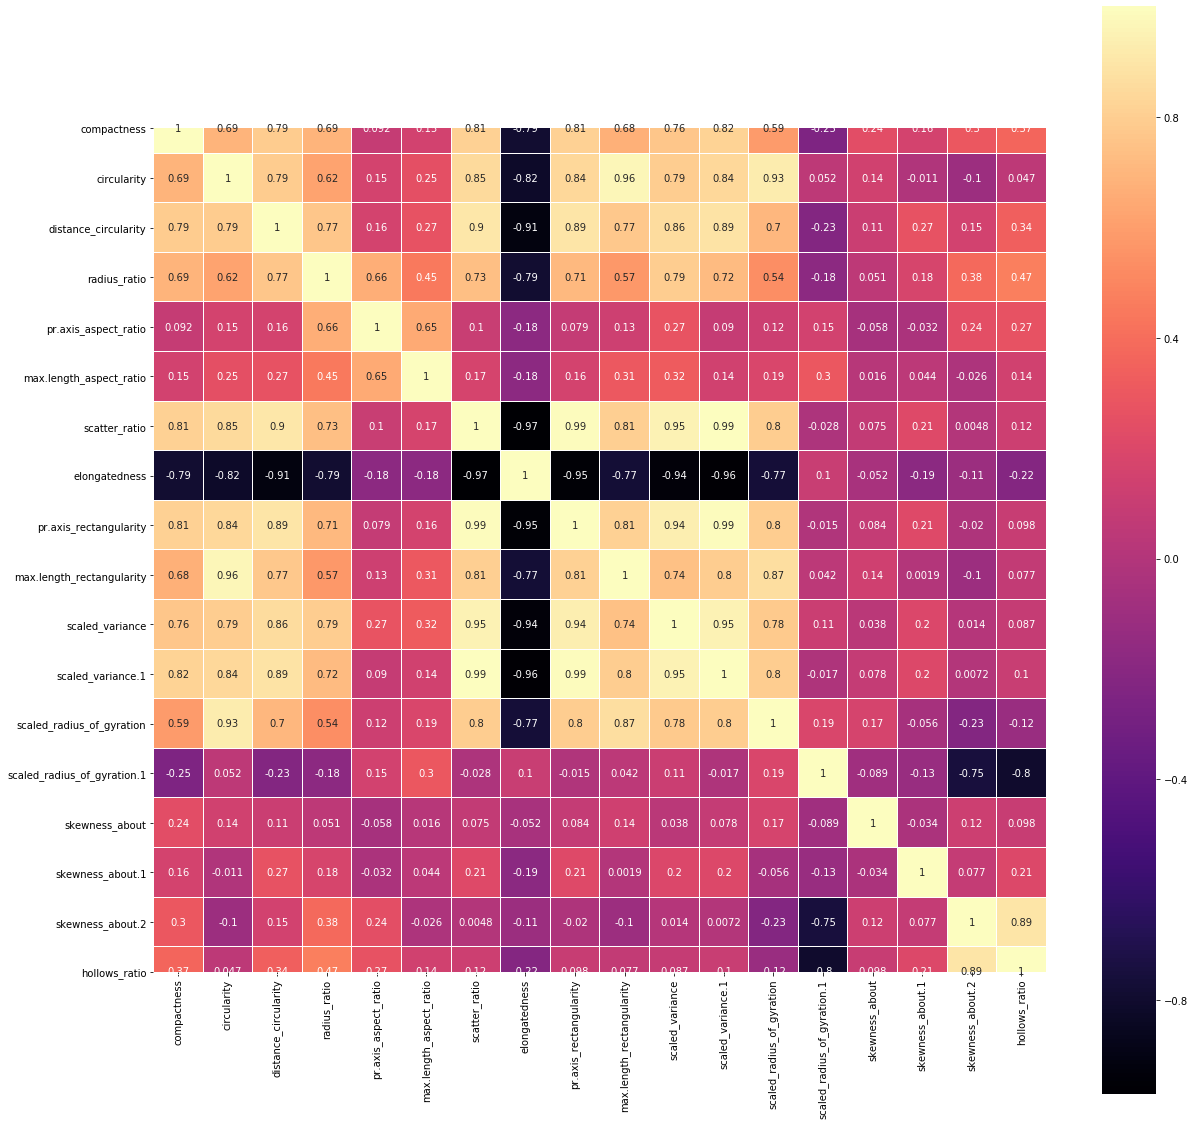

In [35]:
colormap = plt.cm.magma
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)

## Insights From HeatMap
<br>

### High Correlation
<br>
<ul>
    <li>scaled_variance & scaled_variance.1 seems to be strongly correlated with value of 0.95
    </li>
    <br>
    <li>skewness_about.2 and hollow_ratio seems to be strongly correlated with value of 0.89
    </li>
    <br>
    <li>elongatedness has multiple highly negatively correlated values with various attributes as seen in the heatmap
    </li>
    <br>
    <li>scatter_ratio has vales over 0.95 with scaled_variance, scaled_variance.1 and pr_axis.rectangularity
    </li>
    <br>
    <li>scaled_variance & scaled_variance.1 maintains almost same correlation with other attributes with coefficient verying b/w them at less than 0.5
    </li>
    <br>
    <li>scaled_radius_of_gyration has a high postive correlation with circularity
    </li>
</ul>

<br>
<br>

### Low Correlation
<br>
<ul>
    <li>max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.45
    </li>
    <br>
    <li>skewness_about , skewness_about.1 and skewness_about.2 have almost no correlation with the other attributes except b/w skewness_about.2 and hollows_ratio and scaled_radius_of_gyration.1 . Same goes for hollows_ratio.
    </li>
    <br>
    <li>scaled_radius_gyration & scaled_radius_gyration.1 seems to be very little correlated
    </li>
    <br>
    <li>pr.axis_aspect_ratio and max.length_aspect_ratio does not have much correlation with other attributes except with radius_ratio and among themselves.
    </li>
    <br>
    <li>scaled_radius_gyration.1 does not have much correlation with other attributes
    </li>
</ul>

<br>
<br>

## Final Thoughts On Choosing The Right Predictors

<br>
Since our objective is to reocgnize whether an object is a van or bus or car based on some input features, our main assumption is that there is little or no multicollinearity between the features. if our dataset has perfectly positive or negative attributes as can be obseverd from our correlation analysis, there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.
<br>
If two features is highly correlated then there is no point using both features. In such cases, we can drop one of the two correlated feature or transform the two correlated features into a third feature and drop the original two features.
<br>
From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.8 correlation, so we can decide to get rid of those columns whose correlation is +-0.8 or above.There are 8 such columns:
<br>
<ul>
    <li>max.length_rectangularity
    </li>
    <li>scaled_radius_of_gyration
    </li>
    <li>scatter_ratio
    </li>
    <li>elongatedness
    </li>
    <li>pr.axis_rectangularity
    </li>
    <li>scaled_variance
    </li>
    <li>scaled_variance.1
    </li>
    <li>compactness
    </li>
    <li>circularity
    </li>
    <li>distance_circularity
    </li>
    <li>radius_ratio
    </li>
</ul>
<br>
<br>
Also we observed that more than 50 % of our attributes ar highly correlated.
<br>
Well, There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features. We can pick one of the tiwo highly correalated variables and drop another one. Like in our case scaled_variance & scaled_variance.1 are having strong positive correlation , so we can pick one and drop one as they will only make our dimension redundant. Or create a third transformed variable from these two and drop the original two.
<br>
Similarly between elongatedness and pr.axis_rectangularity we can pick one as they have very strong negative correlation. This approach can be used to select the feature we want to carry forward for model analysis. But there is another better approach called PCA
<br>


# Enter Principal Components Analysis or PCA

## But first lets check the performance on non-PCA SVM which we will compare on PCA SVM 


## Splitting the dataset

In [25]:
X = df.drop('class', axis=1)
y = df['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

In [27]:
scale = StandardScaler() # Standard scaling
scale.fit(X_train.loc[:,:])# fitting on training data so the data integrity in test is maintained

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

In [28]:
X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
X_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
663    -0.569751     0.345063              0.046490     -0.018015   
20     -1.182788     0.345063             -0.465551     -0.504169   
402     0.901536     1.166775              1.454605     -0.230707   
17      0.656322    -0.640990             -0.337541      0.832754   
452    -0.201929    -1.134017             -0.529557      0.255446   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
663             -0.118623                -0.147278      -0.150009   
20               0.252283                -0.545401      -0.457080   
402             -1.107706                 0.250844       1.323935   
17               0.870459                -0.545401       0.249185   
452              0.005012                 0.051783      -0.242130   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
663      -0.110757               -0.225343                   0.133191   
20        0.285825               -0.618862                  -0.212638   
402      -1.300504                1.348733                   1.032344   
17       -0.639534                0.168176                  -0.627632   
452       0.021437               -0.225343                  -0.904294   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
663         0.004919          -0.211604                   0.472331   
20         -0.448103          -0.488929                   0.284288   
402         1.202194           1.331012                   0.911097   
17          0.425583           0.267936                  -0.749948   
452        -0.253951          -0.292491                  -1.345417   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
663                    -0.060952        0.101826         -0.303670   
20                      0.325658       -1.323736         -1.099125   
402                     0.196788        1.120084         -0.190034   
17                     -0.060952       -0.509129         -0.303670   
452                    -1.220782        0.101826          1.855422   

     skewness_about.2  hollows_ratio  
663         -0.324168      -0.379088  
20          -0.651654      -0.515100  
402         -0.487911      -0.243076  
17           1.477009       0.436985  
452          1.313266       1.389070

In [30]:
def draw_confusionmatrix(y_test, y_pred, cat1, cat2, cat3, dataset ):
    cm = metrics.confusion_matrix( y_test, y_pred, [0,1,2] )
    print("Confusion Matrix For : \n " ,dataset)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='.1f' ,xticklabels = [cat1, cat2,cat3] , yticklabels = [cat1, cat2,cat3] )
    plt.ylabel('True Vehicle')
    plt.xlabel('Predicted Vehicle')
    plt.show()

In [31]:
#using SVM to train model

svc = SVC( C=1, gamma='auto')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.6f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(svc.score(X_test, y_test)))

y_predict = svc.predict(X_test)

Accuracy on training set: 0.981419
Accuracy on test set: 0.960630


Confusion Matrix For : 
  Scaled Data Set
[[ 63   0   2]
 [  0 123   6]
 [  1   1  58]]


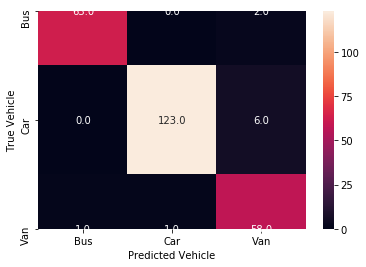

In [32]:
# Getting the confusion matrix

draw_confusionmatrix(y_test, y_predict,"Bus", "Car", "Van", "Scaled Data Set" )

### Classification Report For Scaled Data:

In [33]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.99      0.95      0.97       129
           2       0.88      0.97      0.92        60

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



<b> The model correctly predicted 63 buses, 123 cars and 58 vans. It incorrectly predicted two buses as vans, six cars as vans and two vans as a car and a bus each. </b>

## Performing K Fold Cross Validation

In [35]:
#Perform cross validation

models = []
models.append(('P01', 0.1, 'poly'))
models.append(('P1', 1, 'poly'))
models.append(('P10', 10, 'poly'))
models.append(('P20', 20, 'poly'))
models.append(('P30', 30, 'poly'))

models.append(('S01', 0.1, 'sigmoid'))
models.append(('S1', 1, 'sigmoid'))
models.append(('S10', 10, 'sigmoid'))
models.append(('S20', 20, 'sigmoid'))
models.append(('S30', 30, 'sigmoid'))

models.append(('R01', 0.1, 'rbf'))
models.append(('R1', 10, 'rbf'))
models.append(('R10', 10, 'rbf'))
models.append(('R20', 20, 'rbf'))
models.append(('R30', 30, 'rbf'))

# evaluate each model in turn
results = []
names = []

In [36]:
scale2 = StandardScaler() # Standard scaling
scale2.fit(X.loc[:,:])# fitting on training data so the data integrity in test is maintained

X_scaled = scale2.transform(X.loc[:,:])


In [37]:
X_scaled

array([[ 0.16058035,  0.51807313,  0.05717723, ...,  0.3808703 ,
        -0.31201194,  0.18395733],
       [-0.32546965, -0.62373151,  0.12074088, ...,  0.15679779,
         0.01326483,  0.45297703],
       [ 1.25419283,  0.84430302,  1.51914112, ..., -0.40338349,
        -0.14937355,  0.04944748],
       ...,
       [ 1.49721783,  1.49676282,  1.20132288, ..., -0.96356477,
        -0.31201194,  0.72199673],
       [-0.93303214, -1.43930625, -0.26064101, ...,  1.38919659,
         0.17590322, -0.08506238],
       [-1.05454464, -1.43930625, -1.02340478, ...,  0.60494281,
        -0.47465032, -0.75761164]])

In [39]:
kfold = KFold( n_splits=10, shuffle=True, random_state=1)

for name, c, kernels in models:
    cv_results = cross_val_score( SVC( C=c ,kernel = kernels, gamma = 'auto' ), X_scaled, y, cv=kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('Accuracy of ' + msg)

Accuracy of P01: 0.626429 (0.043268)
Accuracy of P1: 0.827381 (0.043368)
Accuracy of P10: 0.943277 (0.026201)
Accuracy of P20: 0.955084 (0.024080)
Accuracy of P30: 0.955098 (0.025208)
Accuracy of S01: 0.781275 (0.039502)
Accuracy of S1: 0.653739 (0.065116)
Accuracy of S10: 0.600406 (0.051002)
Accuracy of S20: 0.614636 (0.083263)
Accuracy of S30: 0.624076 (0.072175)
Accuracy of R01: 0.881681 (0.032200)
Accuracy of R1: 0.984622 (0.013071)
Accuracy of R10: 0.984622 (0.013071)
Accuracy of R20: 0.983445 (0.016976)
Accuracy of R30: 0.982269 (0.014295)


### Let me take the RBF kernel having regularization parameter of 10 to find its Stats

In [51]:
#using SVM to train model

svc = SVC( C=10, gamma='auto')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.6f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.6f}".format(svc.score(X_test, y_test)))

y_predict = svc.predict(X_test)

Accuracy on training set: 0.994932
Accuracy on test set: 0.968504


Confusion Matrix For : 
  Scaled Data Set
[[ 63   0   2]
 [  0 125   4]
 [  0   2  58]]


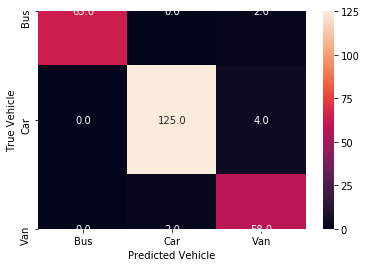

In [52]:
# Getting the confusion matrix

draw_confusionmatrix(y_test, y_predict,"Bus", "Car", "Van", "Scaled Data Set" )

In [53]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.98      0.97      0.98       129
           2       0.91      0.97      0.94        60

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



<b> After doing cross validation after tuning the hyperparameters, the SVM with rbf kernel and C = 10 looks good, with gamma set to auto.  The model correctly predicted 63 buses, 125 cars and 58 vans. It incorrectly predicted two buses as vans, four cars as vans and two vans as cars. </b>

## Finding the Principal Components

In [56]:
#should give an 18*18 matrix
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [57]:
#Performing PCA on all of its 18 predictors
pca = PCA(n_components=18)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
#Eigen Values or the variance explained by each of the components
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [59]:
#Eigen vectors
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [60]:
# To find the percentage of variance explained by each of the components / predictors
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [62]:
# To find the cumulative sum of variances explained by the components
print(np.cumsum(pca.explained_variance_ratio_))

[0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549 0.97335049 0.98226265 0.98735979 0.99104984 0.9936357
 0.99562195 0.99714304 0.99828498 0.99927917 0.9998355  1.        ]


<b> From the cumulative sum above , it looks like 95% of the variance is explained by the first 7 components. Therefore 7 dimensions are enough.  </b>

## Have a look at the pairplot with all PCA reduced dimensions

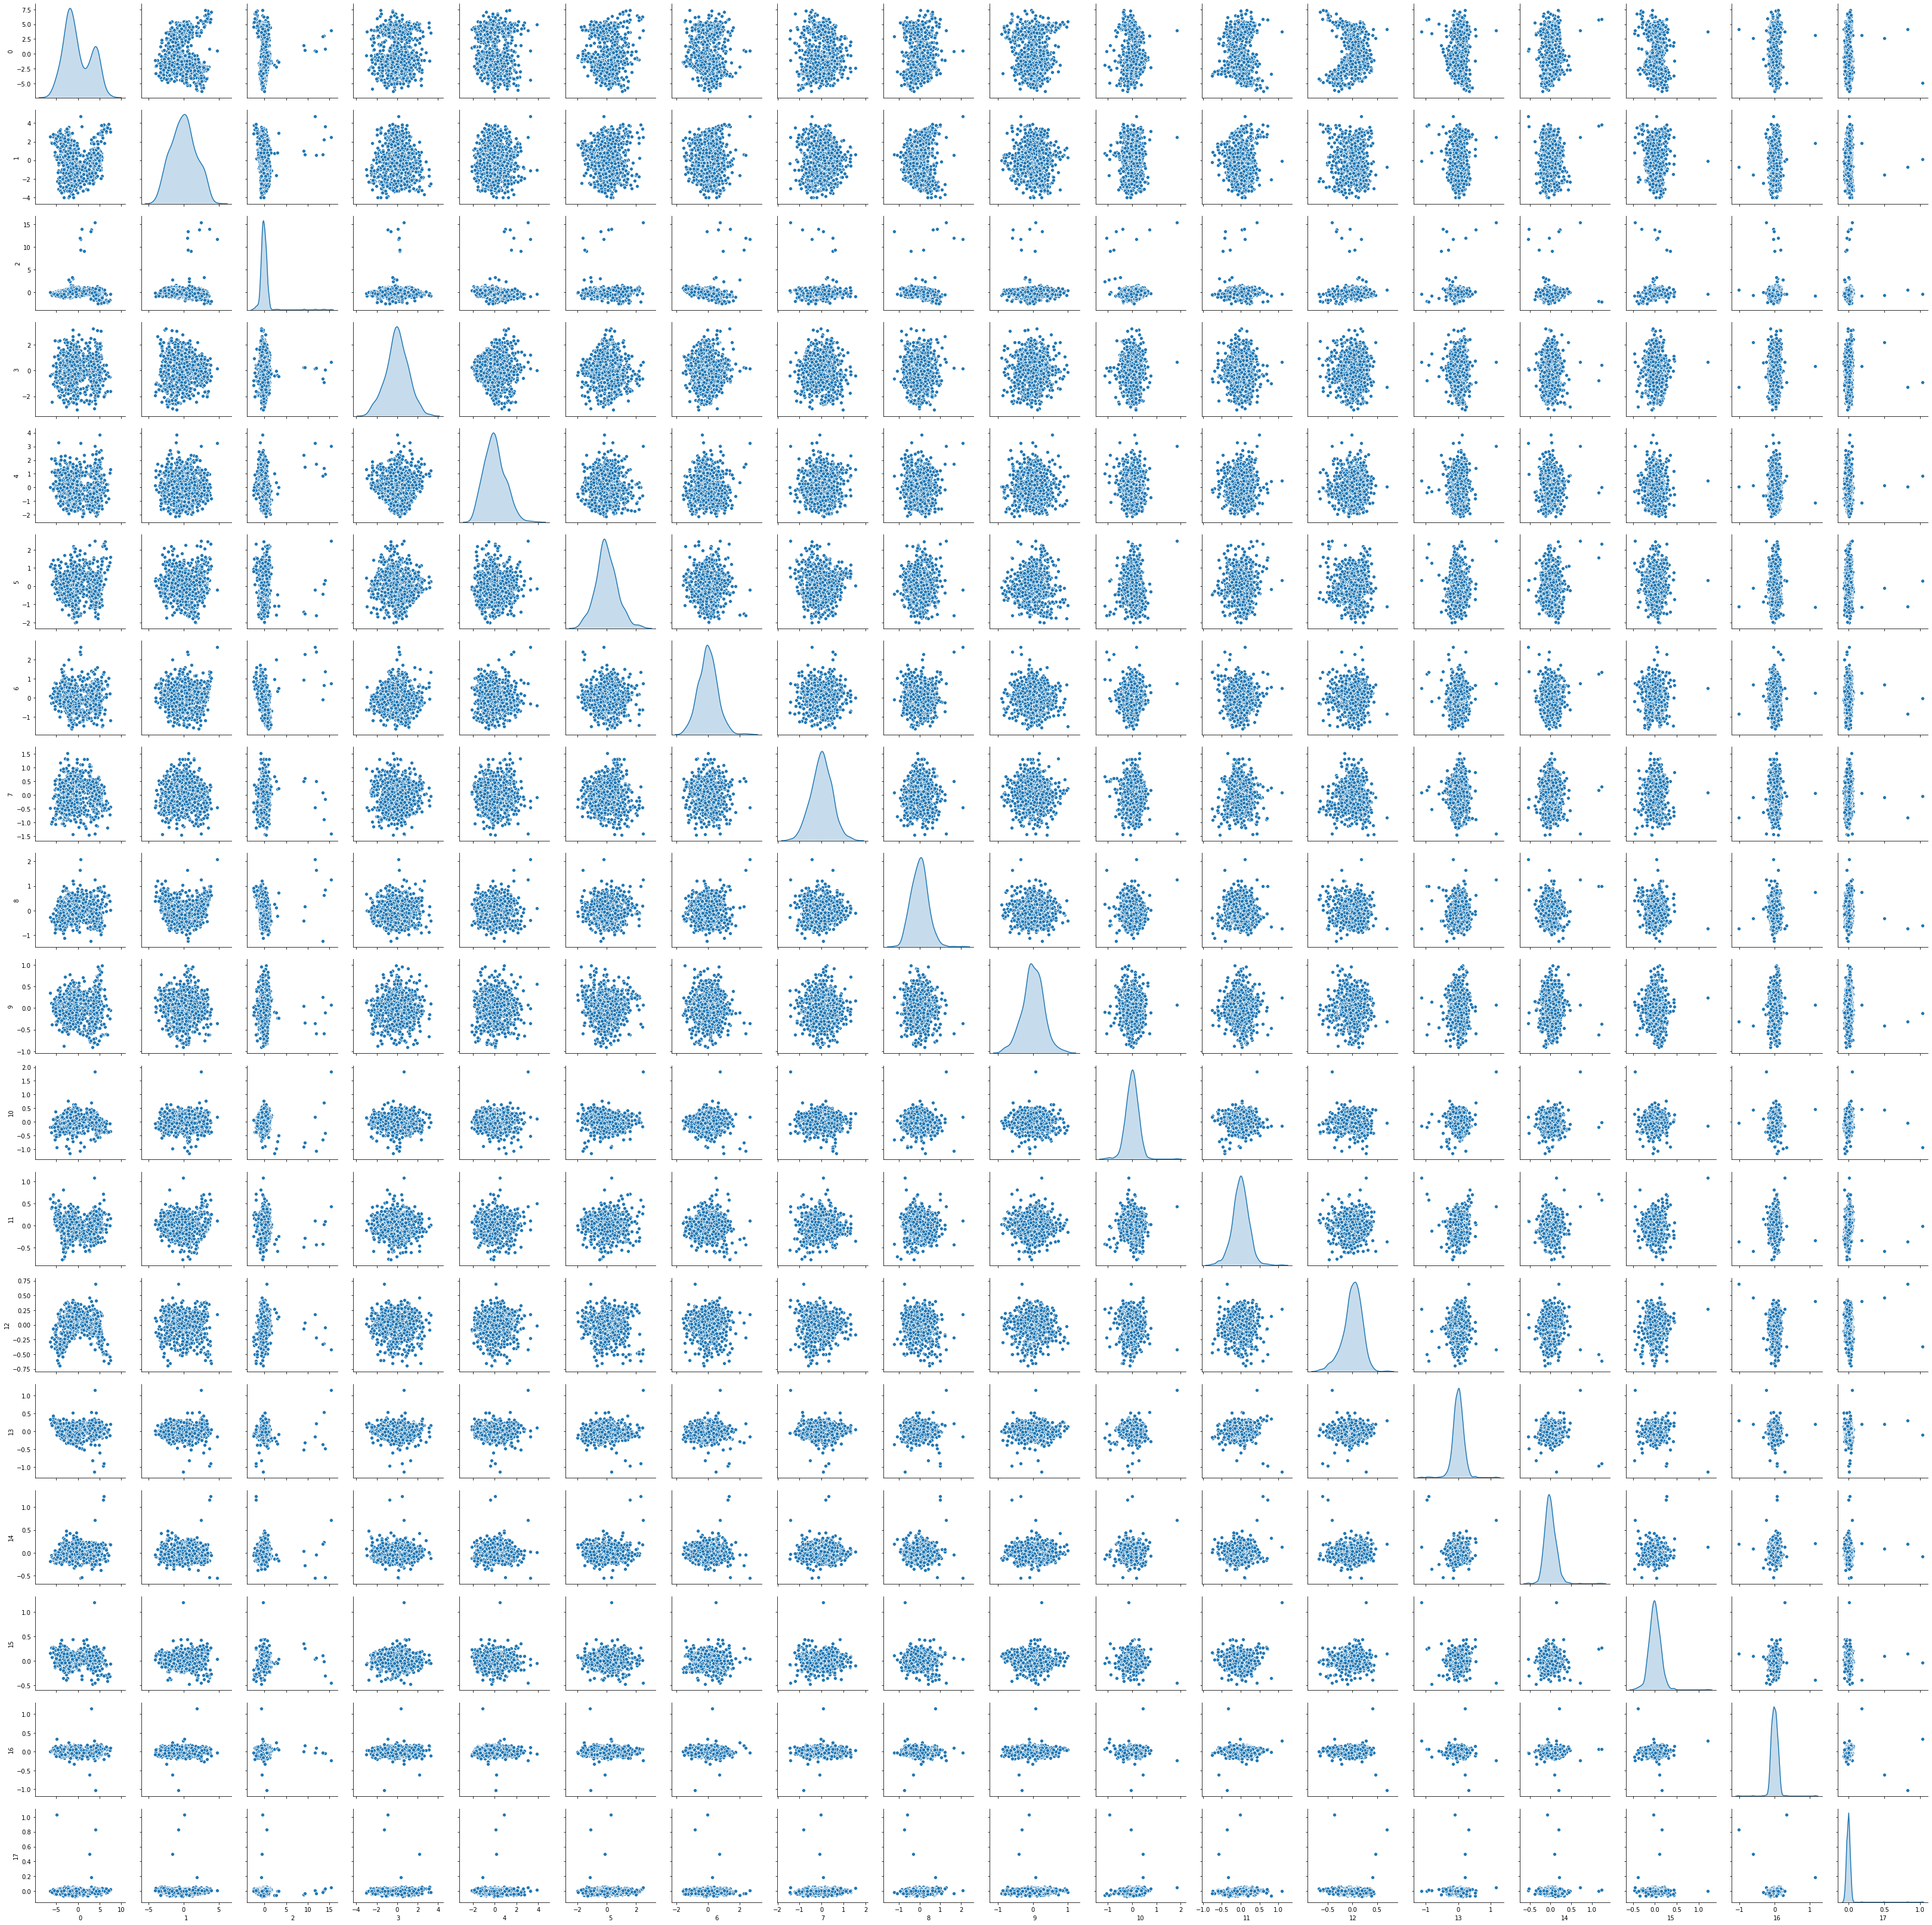

In [63]:
sns.pairplot( pd.DataFrame(pca.transform(X_scaled)), diag_kind='kde')

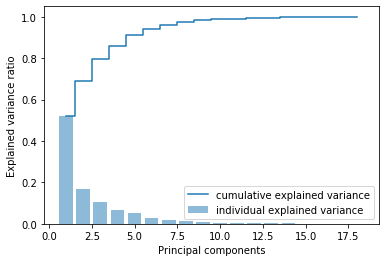

In [64]:
plt.bar(range(1,19), pca.explained_variance_ratio_, alpha = 0.5, align='center', label='individual explained variance')
plt.step( range(1,19), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### It looks like 7 dimensions are enough to explain the 95% of the variance in data

## Lets get the reduced dimensions dataset from PCA

In [65]:
pca2 = PCA(n_components=7)
pca2.fit(X_scaled)
print(pca2.components_)
print(pca2.explained_variance_ratio_)

# getting the dataset of the reduced set of dimensions that we will feed to SVM later on
Xpca =pca2.transform(X_scaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [67]:
# Checking the cumulative variance
print(np.cumsum(pca2.explained_variance_ratio_))

[0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549]


In [68]:
# Xpca is an ndarray, need to convert to a dataframe
Xdf = pd.DataFrame(Xpca)

In [69]:
Xdf

0         1          2         3         4         5         6
0    0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124
1   -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637
2    3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584
3   -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753
4    0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578
..        ...       ...        ...       ...       ...       ...       ...
841 -0.442648 -0.605884   0.197213 -1.444958  1.065425  0.820179 -0.041563
842 -0.314956  0.164511   0.794573 -0.908272 -0.235492 -1.438257 -0.599113
843  4.809174 -0.001249   0.532333  0.295652 -1.344236 -0.217070  0.573249
844 -3.294092 -1.008276  -0.357003 -1.933675  0.042768 -0.402491 -0.202406
845 -4.765053  0.334900  -0.568136 -1.224807 -0.054051 -0.335637  0.058098

[846 rows x 7 columns]

## Having a look at the pairplot pf reduced dimensions after PCA

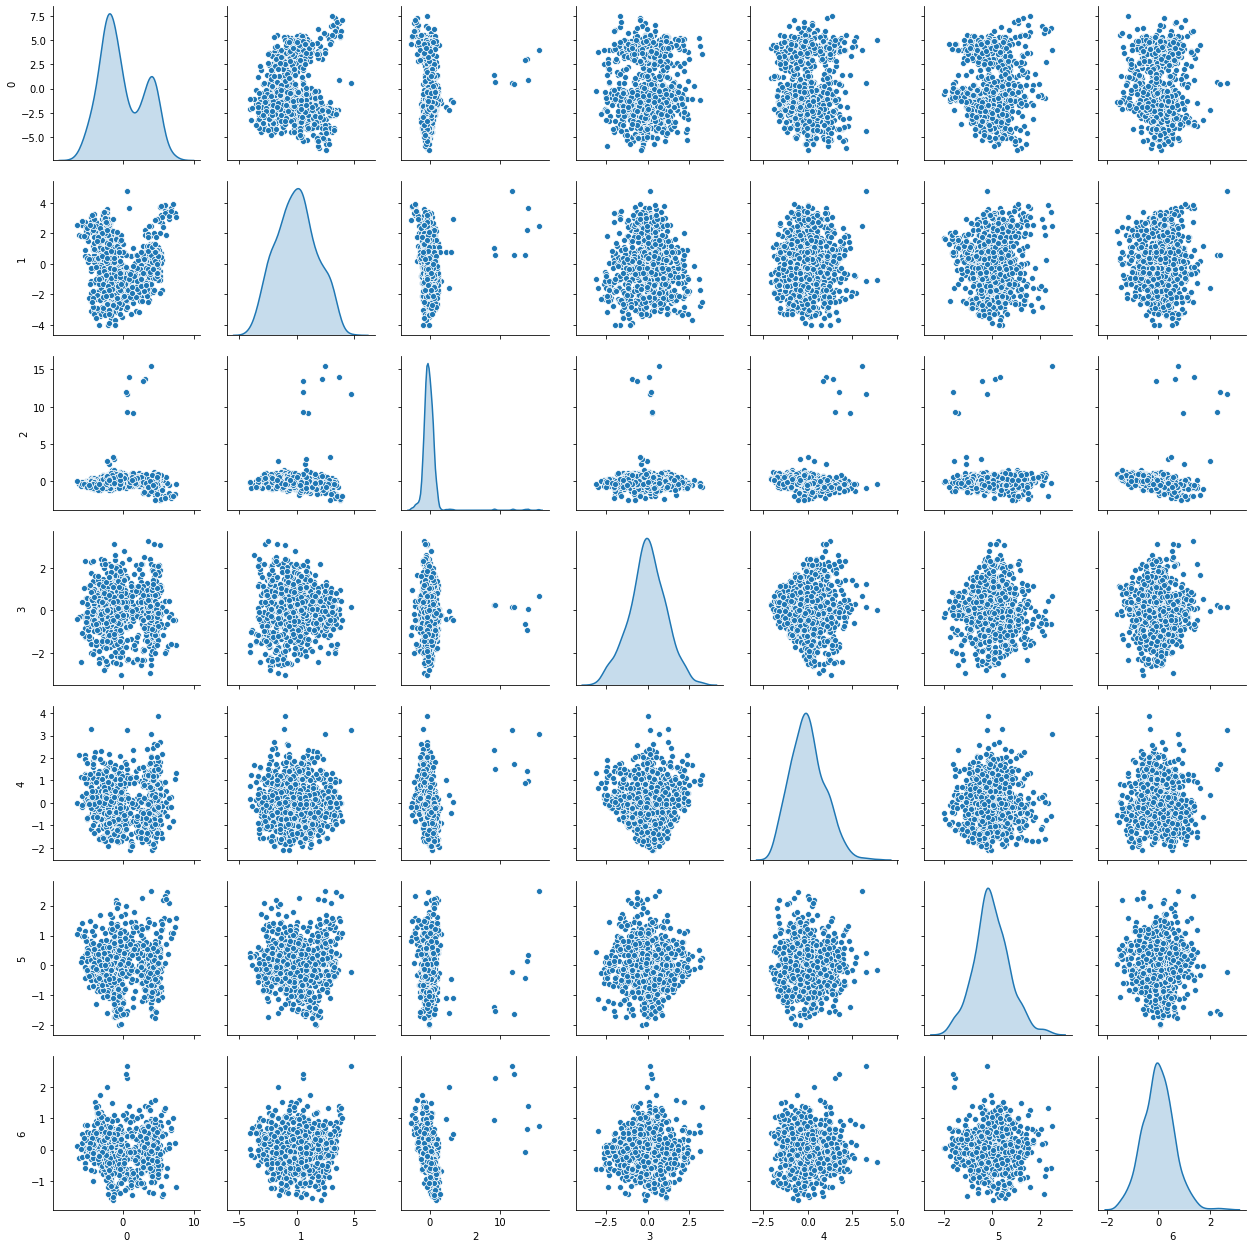

In [70]:
sns.pairplot(Xdf, diag_kind='kde')

### It is clealry visible from the pairplot above that:
After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

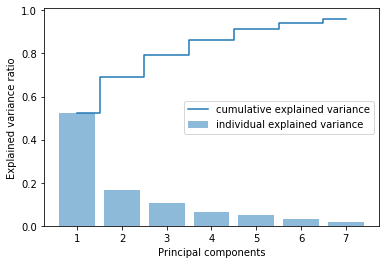

In [71]:
plt.bar(range(1,8), pca2.explained_variance_ratio_, alpha = 0.5, align='center', label='individual explained variance')
plt.step( range(1,8), np.cumsum(pca2.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

<br>
<br>

## Building SVM model on PCA reduced set of data

In [72]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split( Xdf, y, test_size=0.30, random_state=1, stratify = y)

In [74]:
#using SVM to train model

svc = SVC( C=10, gamma='auto')
svc.fit(pca_X_train, pca_y_train)

print("Accuracy on training set: {:.6f}".format(svc.score(pca_X_train, pca_y_train)))
print("Accuracy on test set: {:.6f}".format(svc.score(pca_X_test, pca_y_test)))

pca_y_predict = svc.predict(pca_X_test)

Accuracy on training set: 0.988176
Accuracy on test set: 0.901575


Confusion Matrix For : 
  PCA Reduced Data Set
[[ 60   3   2]
 [  4 115  10]
 [  0   6  54]]


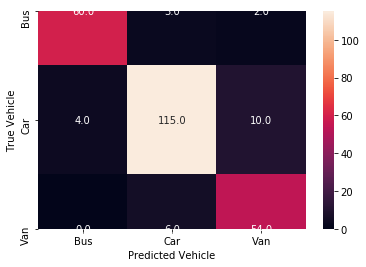

In [75]:
# Getting the confusion matrix

draw_confusionmatrix(pca_y_test, pca_y_predict,"Bus", "Car", "Van", "PCA Reduced Data Set" )

In [76]:
print(metrics.classification_report(pca_y_test,pca_y_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.93      0.89      0.91       129
           2       0.82      0.90      0.86        60

    accuracy                           0.90       254
   macro avg       0.89      0.90      0.90       254
weighted avg       0.90      0.90      0.90       254



<b> After running the SVM model on the PCA reduced set of scaled data, the model correctly predicted 60 buses, 115 cars and 54 vans. It incorrectly predicted two buses as vans, three buses as cars, ten cars as vans, four cars as buss and six vans as cars. </b>

In [77]:
#Perform cross validation

models2 = []
models2.append(('P01', 0.1, 'poly'))
models2.append(('P1', 1, 'poly'))
models2.append(('P10', 10, 'poly'))
models2.append(('P20', 20, 'poly'))
models2.append(('P30', 30, 'poly'))

models2.append(('S01', 0.1, 'sigmoid'))
models2.append(('S1', 1, 'sigmoid'))
models2.append(('S10', 10, 'sigmoid'))
models2.append(('S20', 20, 'sigmoid'))
models2.append(('S30', 30, 'sigmoid'))

models2.append(('R01', 0.1, 'rbf'))
models2.append(('R1', 10, 'rbf'))
models2.append(('R10', 10, 'rbf'))
models2.append(('R20', 20, 'rbf'))
models2.append(('R30', 30, 'rbf'))

# evaluate each model in turn
results2 = []
names2 = []

In [78]:
kfold = KFold( n_splits=10, shuffle=True, random_state=1)

for name, c, kernels in models2:
    cv_results2 = cross_val_score( SVC( C=c ,kernel = kernels, gamma = 'auto' ), Xdf, y, cv=kfold, scoring= 'accuracy')
    results2.append(cv_results2)
    names2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print('Accuracy of ' + msg)

Accuracy of P01: 0.756527 (0.050534)
Accuracy of P1: 0.870028 (0.033569)
Accuracy of P10: 0.905504 (0.034404)
Accuracy of P20: 0.897255 (0.035132)
Accuracy of P30: 0.892563 (0.042673)
Accuracy of S01: 0.562591 (0.059194)
Accuracy of S1: 0.492843 (0.033693)
Accuracy of S10: 0.477479 (0.038741)
Accuracy of S20: 0.479818 (0.039173)
Accuracy of S30: 0.479818 (0.039173)
Accuracy of R01: 0.823725 (0.037928)
Accuracy of R1: 0.935014 (0.015965)
Accuracy of R10: 0.935014 (0.015965)
Accuracy of R20: 0.931485 (0.016334)
Accuracy of R30: 0.929090 (0.015821)


In [89]:
#using SVM to train model

svc2 = SVC( C=10, gamma='auto')
svc2.fit(pca_X_train, pca_y_train)

print("Accuracy on training set: {:.6f}".format(svc2.score(pca_X_train, pca_y_train)))
print("Accuracy on test set: {:.6f}".format(svc2.score(pca_X_test, pca_y_test)))

pca_y_predict = svc2.predict(pca_X_test)

Accuracy on training set: 0.988176
Accuracy on test set: 0.901575


In [83]:
print(accuracy_score(pca_y_test,pca_y_predict))

0.9015748031496063


Confusion Matrix For : 
  PCA Reduced Data Set
[[ 60   3   2]
 [  4 115  10]
 [  0   6  54]]


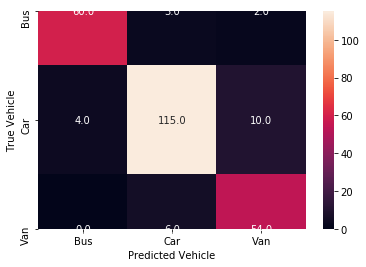

In [84]:
# Getting the confusion matrix

draw_confusionmatrix(pca_y_test, pca_y_predict,"Bus", "Car", "Van", "PCA Reduced Data Set" )

In [85]:
print(metrics.classification_report(pca_y_test,pca_y_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.93      0.89      0.91       129
           2       0.82      0.90      0.86        60

    accuracy                           0.90       254
   macro avg       0.89      0.90      0.90       254
weighted avg       0.90      0.90      0.90       254



<b> After doing cross validation after tuning the hyperparameters, the SVM with rbf kernel and C = 10 looks good, with gamma set to auto.  The model correctly predicted 60 buses, 115 cars and 54 vans. It incorrectly predicted two buses as vans, three buses as cars, four cars as buses, ten cars as vans and six vans as cars. </b>

## To find correlation b/w components and features

In [90]:
df_comp = pd.DataFrame(pca2.components_,columns=list(X.columns.values))

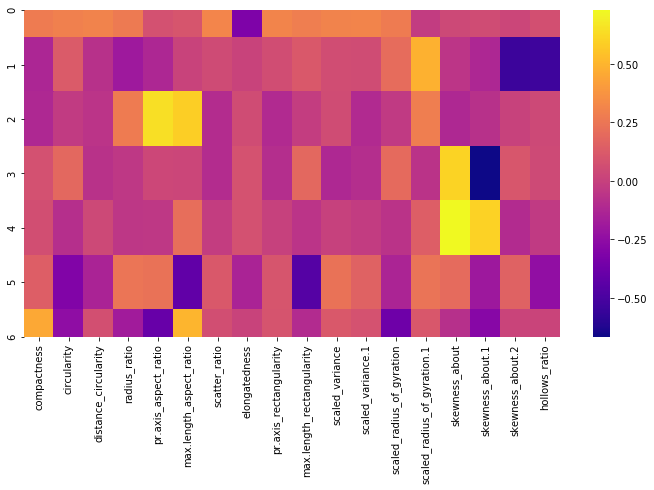

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

<ul>
    <li>From above, PC1 belongs to the predictor - 'elongatedness'
    </li> 
    <li>PC2 belongs to scaled_radius_of_gyration.1, skewness_about.2 and hollows_ratio
    </li>
    <li>PC3 belongs to pr.axis_aspect_ratio andmax.length_aspect_ratio, and so on
    </li>
    </ul>

<br>
<br>
<br>

## Final Verdict

<ul>
    <li>The accuracy score of SVM model using raw data is around 96%. This uses the scaled data of all the 18 dimensions.
    </li>
    <br>
    <li>The cross validation score of the SVM model on raw data is around 98.5%. This also uses the scaled data of all the 18 dimensions.
    </li>
    <br>
    <li>The accuracy score of SVM model using PCA reduced set of data is around 90%. This uses seven dimensions instead of the original 18 dimensions. The accuracy went down by 6% from the original set of 18 dimensions and by 8.5% on cross validation score. Not bad considering it used 11 less dimensions.
    </li>
    <br>
    <li>The cross validation score of the SVM model on raw data is around 93.5%. This uses seven dimensions instead of the original 18 dimensions. The score here is pretty impressive considering it uses 11 less dimensions and is just 5% shy of the raw data cross validation score.
    </li>
    <br>
    <li>Such PCA reduced data should do well with Naive Bayes model, considering the relevant theory behind Naive Bayes and PCA.
    </li>
    <br>
    <li>Finally I would choose the model with cross valdiation score of 98.5% having all the 18 dimensions as it is normal for SVM to handle such multiple dimensions.
    </li>
</ul>